In [1]:
from ctapipe.io import EventSource
from ctapipe import utils
from matplotlib import pyplot as plt
import numpy as np

/home/vhep/mescob11/.conda/envs/ctapipe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Method to open a simulation file
path = "simtel_files/gamma_20deg_0deg_run838___cta-prod3-sct_desert-2150m-Paranal-SCT.simtel.gz"
source = EventSource(path, focal_length_choice='EQUIVALENT', back_seekable=True)
# Methods inside the class are displayed below
source

allowed_tels,None,"list of allowed tel_ids, others will be ignored. If None, all telescopes in the input stream will be included (default: None)"
atmosphere_profile_choice,AtmosphereProfileKind.AUTO,"Which type of atmosphere density profile to load from the file, in case more than one exists. If set to AUTO, TABLE will be attempted first and if missing, FIVELAYER will be loaded. (default: AtmosphereProfileKind.AUTO)"
back_seekable,True,Require the event source to be backwards seekable. This will reduce in slower read speed for gzipped files and is not possible for zstd compressed files (default: False)
calib_scale,1.0,Factor to transform ADC counts into number of photoelectrons. Corrects the DC_to_PHE factor. (default: 1.0)
calib_shift,0.0,Factor to shift the R1 photoelectron samples. Can be used to simulate mis-calibration. (default: 0.0)
focal_length_choice,FocalLengthKind.EQUIVALENT,"If both nominal and effective focal lengths are available in the SimTelArray file, which one to use for the `~ctapipe.coordinates.CameraFrame` attached to the `~ctapipe.instrument.CameraGeometry` instances in the `~ctapipe.instrument.SubarrayDescription`, which will be used in CameraFrame to TelescopeFrame coordinate transforms. The 'nominal' focal length is the one used during the simulation, the 'effective' focal length is computed using specialized ray-tracing from a point light source (default: FocalLengthKind.EFFECTIVE)"
gain_selector_type,ThresholdGainSelector,"The name of a GainSelector subclass. Possible values: ['ManualGainSelector', 'ThresholdGainSelector'] (default: ThresholdGainSelector)"
input_url,/home/vhep/mescob11/ctapipe/simtel_files/gamma_20deg_0deg_run838___cta-prod3-sct_desert-2150m-Paranal-SCT.simtel.gz,Path to the input file containing events. (default: traitlets.Undefined)
max_events,None,Maximum number of events that will be read from the file (default: None)
skip_calibration_events,True,Skip calibration events (default: True)


In [3]:
# You can loop over the events stored in source (simtel file) and access event information (id, energy)
for event in source:
    print(event.count, event.index.event_id, event.simulation.shower.energy)

0 2700 0.18786011636257172 TeV
1 4100 0.02628472074866295 TeV
2 4103 0.02628472074866295 TeV
3 5602 0.08019627630710602 TeV
4 6304 0.1343844085931778 TeV
5 6308 0.1343844085931778 TeV
6 6700 0.05100225657224655 TeV
7 6706 0.05100225657224655 TeV
8 8908 0.07633992284536362 TeV
9 14601 0.10829805582761765 TeV
10 14605 0.10829805582761765 TeV
11 15604 0.054640430957078934 TeV
12 24901 0.06259117275476456 TeV
13 28801 0.09090577811002731 TeV
14 32204 0.07983667403459549 TeV
15 34300 0.2780213952064514 TeV
16 34302 0.2780213952064514 TeV
17 35507 0.011147472076117992 TeV
18 36608 0.1545579880475998 TeV
19 43700 0.06062508374452591 TeV
20 43709 0.06062508374452591 TeV
21 45301 0.4826694428920746 TeV
22 47306 0.08693394064903259 TeV
23 50202 0.07676294445991516 TeV
24 50209 0.07676294445991516 TeV
25 50509 0.09656158089637756 TeV
26 54801 0.11755422502756119 TeV
27 72304 0.19472160935401917 TeV
28 82204 0.05482310429215431 TeV
29 84604 0.14705140888690948 TeV
30 84706 0.04658769443631172 TeV


In [4]:
# The events have different data levels that can be accessed
# Below you can see the different levels
# To see more information on each level just try event.r0 for example
event

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information with default None
                          r0.*: Raw Data with default None
                          r1.*: R1 Calibrated Data with default None
                         dl0.*: DL0 Data Volume Reduced Data with default None
                         dl1.*: DL1 Calibrated image with default None
                         dl2.*: DL2 reconstruction info with default None
                  simulation.*: Simulated Event Information with default None
                                with type <class
                                'ctapipe.containers.SimulatedEventContainer'>
                     trigger.*: central trigger information with default None
                         count: number of events processed with default 0
                    pointing.*: Array and telescope pointing positions with
                                default None
                 calibration.*: Container for calibra

In [5]:
# In general any parameter that shows in ctapipe can be accessed just
# by doing say ctapipe_variable.method1 or ctapipe.method1.method2
# or ctapipe.method1.method2.method3 and so forth
event.index

ctapipe.containers.EventIndexContainer:
                        obs_id: Observation Block ID with default
                                18446744073709551615
                      event_id: Array Event ID with default 18446744073709551615

In [6]:
# obs_id is accessible doing
event.index.obs_id

838

In [7]:
# Same thing can be done with other ctapipe classes
# Useful for exploring what is inside classes

In [8]:
# Loading the telescope array information
subarray = source.subarray
subarray

SubarrayDescription(name='MonteCarloArray', n_tels=41)

In [9]:
# The subarray has different methods that can be called
# Below are just shown a few methods
print("telescope IDs as an array", "\n", subarray.tel_ids)
print("\n", "returns dict mapping tel_id to tel_index, useful for unpacking lists based on tel_ids into fixed-length arrays", "\n", subarray.tel_indices)
print("\n", "returns the telescope types in your array \n", subarray.telescope_types)
# A more complicated array might have different telescope types. To access specific telescopes you can use the method below.
# In this case there are only SCTs but in general there can be a combination of SSTs, MSTs, LSTs.
print("\n",subarray.get_tel_ids_for_type("MST_SCT_SCTCam"))

telescope IDs as an array 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]

 returns dict mapping tel_id to tel_index, useful for unpacking lists based on tel_ids into fixed-length arrays 
 {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40}

 returns the telescope types in your array 
 (TelescopeDescription(type='MST', optics_name='SCT', camera_name='SCTCam'),)

 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41)


In [10]:
# You can access a specific telescope through their indices throught the subarray object
subarray.tel[2]

TelescopeDescription(type='MST', optics_name='SCT', camera_name='SCTCam')

In [11]:
# You can also access information on that telescope
subarray.tel[2].optics

OpticsDescription(name=SCT, size_type=MST, reflector_shape=SCHWARZSCHILD_COUDER, equivalent_focal_length=5.59 m, effective_focal_length=nan m, n_mirrors=1, mirror_area=73.35 m2)

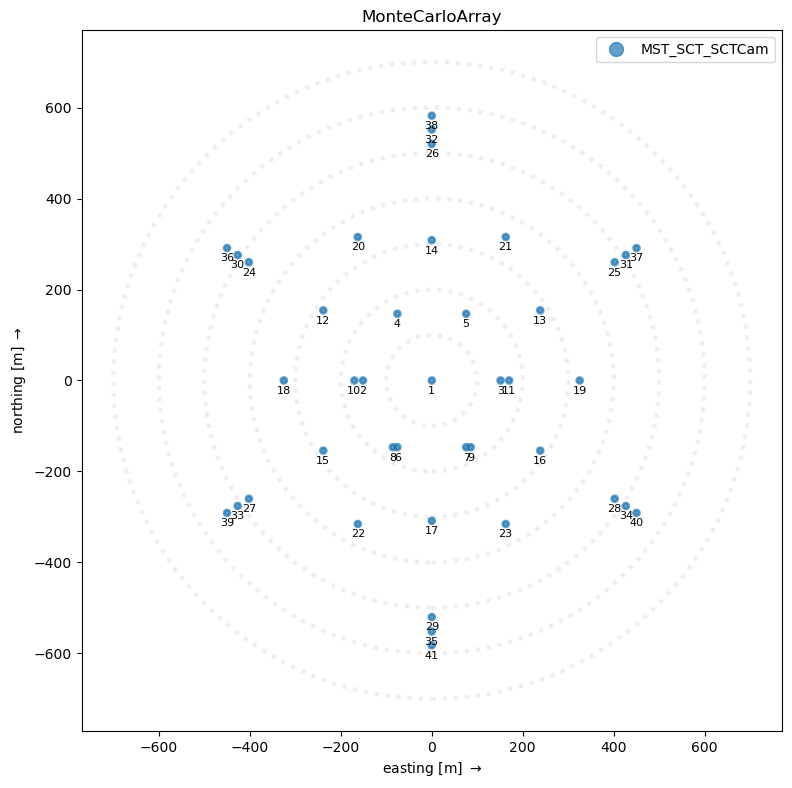

In [12]:
# subarray also has a method of doing a quick plot of the telescope configuration
# used in the simtel file
subarray.peek()

In [13]:
# Can also display the information on a table
subarray.to_table()

tel_id,name,type,pos_x,pos_y,pos_z,camera_name,optics_name,camera_index,optics_index,tel_description
,,,m,m,m,,,,,
int16,str3,str3,float32,float32,float32,str6,str3,int64,int64,str14
1,SCT,MST,0.0,0.0,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
2,SCT,MST,0.0,151.2,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
3,SCT,MST,0.0,-151.2,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
4,SCT,MST,146.65599,75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
5,SCT,MST,146.65599,-75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
6,SCT,MST,-146.65599,75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
7,SCT,MST,-146.65599,-75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
8,SCT,MST,-146.65599,85.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam


In [14]:
# Class used to display events on camera
from ctapipe.visualization import CameraDisplay

In [15]:
# Although we have many events when calling looping over source, only the last one is stored
# Still need to figure out how to access an event through indexing as opposed to just using last one stored
# Need to check which telescopes were triggered from this last event
event.trigger.tels_with_trigger

array([12, 20, 24, 30, 36], dtype=int16)

In [16]:
# Telescope with index 20 was triggered
# r0 is data in camera or simulation format
event.r0.tel[20]

ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples) with default None

In [17]:
# This contains the traces for each pixel in the camera for this specific telescope
r0tel = event.r0.tel[20]

In [18]:
# 1 channel - other cameras might have 2 since there is low and high gain modes
# 11328 pixels
# 64 time slices 
print(r0tel.waveform.shape)
# (N_channels, N_pixels, N_samples)

(1, 11328, 64)


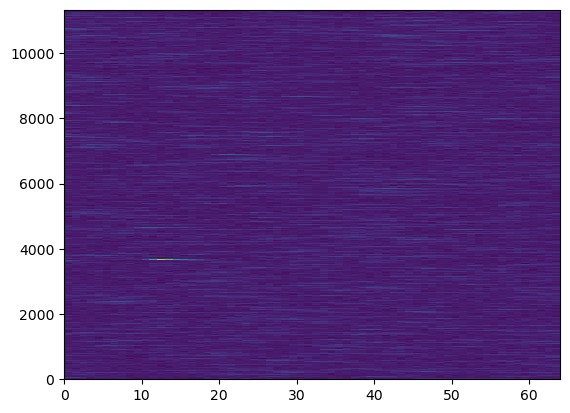

In [19]:
# Displaying the traces in a 2D histogram
# r0tel.waveform[0] is just accessing one of the gain modes - in this case just one so
# r0tel.waveform[0] is 11328 x 64 histogram
plt.pcolormesh(r0tel.waveform[0])

In [20]:
# np.argmax returns the index of the highest value
# r0tel.waveform[0].sum(axis=1) returns the 11328 pixel values (1D-hist)
brightest_pixel = np.argmax(r0tel.waveform[0].sum(axis=1))

# r0tel.waveform[0,brightest_pixel] is looking at a single pixel over all time samples
print(r0tel.waveform[0,brightest_pixel].shape)

# r0tel.waveform[0,brightest_pixel].sum() sums over them
print(f"pixel {brightest_pixel} has sum {r0tel.waveform[0,brightest_pixel].sum()}")

(64,)
pixel 4632 has sum 2595


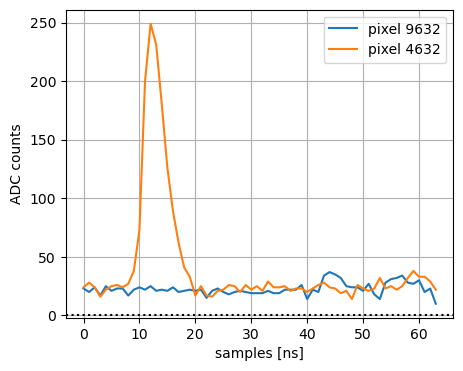

In [21]:
# Plots the trace of the brightest pixel
plt.figure(figsize=(5,4))
plt.plot(r0tel.waveform[0,brightest_pixel+5000], label = 'pixel {}'.format(brightest_pixel+5000))
plt.plot(r0tel.waveform[0,brightest_pixel], label ='pixel {}'.format(brightest_pixel))
plt.axhline(0, color='black', linestyle='dotted')
#plt.plot(r0tel.waveform[1,brightest_pixel], label="channel 1 (low-gain)")
plt.xlabel('samples [ns]')
plt.ylabel('ADC counts')
plt.grid()
plt.legend()

In [22]:
# Save all the information of a single triggered telescope in a variable
tel = subarray.tel[20]
tel.optics.mirror_area

<Quantity 73.34757233 m2>

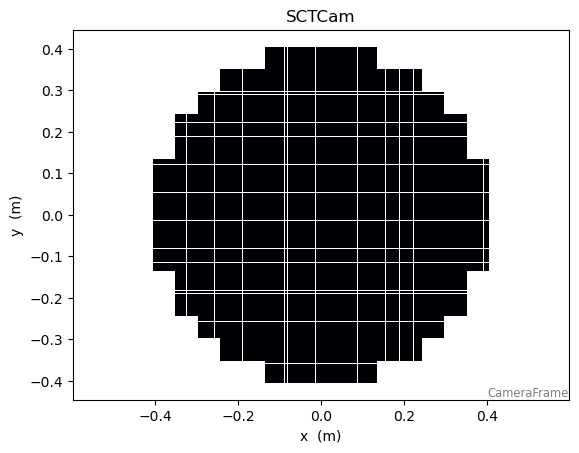

In [23]:
# Class for displaying events r0, dl0, dl1
# camera.geometry will be required for displaying events 
# and using other methods
CameraDisplay(tel.camera.geometry)

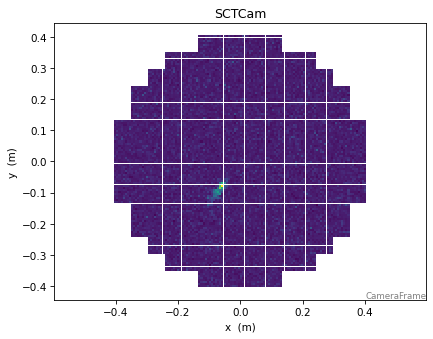

In [24]:
# Displays channel 0, all pixels and a specific time sample
plt.figure(dpi=75)
# Class needs to be called to display image
disp = CameraDisplay(tel.camera.geometry, cmap='viridis')
# Not entirely sure how the displaying of things works out but the method is as follows
disp.image = r0tel.waveform[0,:,13] 

In [25]:
# Little animation to show you how the image is generated over time 
from matplotlib.animation import FuncAnimation
from IPython import display

In [26]:
fig, ax = plt.subplots(1, 1)
disp = CameraDisplay(tel.camera.geometry, ax=ax, cmap='viridis')
disp.add_colorbar()

__, ____, n_samples = r0tel.waveform.shape

def draw_sample(frame):
    ax.set_title(f"sample [1ns]: {frame}")
    disp.image = r0tel.waveform[0,:,frame]

anim = FuncAnimation(fig, func=draw_sample, frames=n_samples, interval=300)
#anim.save('basic_animation.mp4', fps=30)
plt.close(fig)
video = anim.to_html5_video()
display.display(display.HTML(video))


In [27]:
# Module for image calibration
from ctapipe.calib import CameraCalibrator

In [28]:
# Class needs to take subarray object
calib = CameraCalibrator(subarray=subarray)
calib

apply_peak_time_shift,"[('type', '*', True)]","Apply peak time shift corrections. Apply the remaining absolute and fractional time shift corrections to the peak time after pulse extraction. If `apply_waveform_time_shift` is False, this will apply the full time shift. (default: traitlets.Undefined)"
apply_waveform_time_shift,"[('type', '*', False)]",Apply waveform time shift corrections. The minimal integer shift to synchronize waveforms is applied before peak extraction if this option is True. (default: traitlets.Undefined)
data_volume_reducer_type,NullDataVolumeReducer,"The name of a DataVolumeReducer subclass. Possible values: ['NullDataVolumeReducer', 'TailCutsDataVolumeReducer'] (default: NullDataVolumeReducer)"
image_extractor_type,"[('type', '*', 'NeighborPeakWindowSum')]","Name of the ImageExtractor subclass to be used. The name of a ImageExtractor subclass. Possible values: ['FullWaveformSum', 'FixedWindowSum', 'GlobalPeakWindowSum', 'LocalPeakWindowSum', 'SlidingWindowMaxSum', 'NeighborPeakWindowSum', 'TwoPassWindowSum', 'FlashCamExtractor', 'BaselineSubtractedNeighborPeakWindowSum'] (default: traitlets.Undefined)"
invalid_pixel_handler_type,NeighborAverage,Name of the InvalidPixelHandler to use. Possible values: ['NeighborAverage'] (default: NeighborAverage)


In [29]:
for event in EventSource(path, focal_length_choice='EQUIVALENT', back_seekable=True):
    calib(event) # fills in dl0, and dl1
    #print(event)
    print(event.dl1.tel.keys())
# r1: Raw data in common format, with preliminary calibration
# dl0: raw archived data in common format, with optional zero suppression
# dl1: processed data

dict_keys([1, 3, 5, 7, 8, 9, 11, 13, 16, 19])
dict_keys([29])
dict_keys([23])
dict_keys([19, 28])
dict_keys([12, 18])
dict_keys([17, 22, 29, 35, 41])
dict_keys([30])
dict_keys([8])
dict_keys([18])
dict_keys([22])
dict_keys([23])
dict_keys([15, 33])
dict_keys([37])
dict_keys([1, 2, 4, 10])
dict_keys([26, 32, 38])
dict_keys([17, 22, 29, 35, 41])
dict_keys([11, 13, 19])
dict_keys([8])
dict_keys([3, 7, 9, 11, 16, 23])
dict_keys([25])
dict_keys([19])
dict_keys([4, 5, 11, 13, 14, 21, 25, 37])
dict_keys([28, 34, 40])
dict_keys([25, 37])
dict_keys([17, 22])
dict_keys([30])
dict_keys([5, 11, 13, 21])
dict_keys([20, 24, 30, 36])
dict_keys([3, 11])
dict_keys([12, 20, 24, 30, 36])
dict_keys([6, 17])
dict_keys([18])
dict_keys([33])
dict_keys([10, 12, 15, 18, 27, 33])
dict_keys([37])
dict_keys([13, 21])
dict_keys([3])
dict_keys([26, 38])
dict_keys([7, 8])
dict_keys([13, 14, 21, 25, 31])
dict_keys([29])
dict_keys([41])
dict_keys([27, 33, 39])
dict_keys([5, 14, 21, 26, 32])
dict_keys([39])
dict_keys([

In [30]:
# Upon applying calibration r1, dl0, dl1 are filled
# The telescopes that are triggered are kept and have many
# methods that can be accessed. 
event.dl1.tel

Map(ctapipe.containers.DL1CameraContainer, {12: ctapipe.containers.DL1CameraContainer:
                         image: Numpy array of camera image, after waveform
                                extraction.Shape: (n_pixel) with default None as
                                a 1-D array with dtype float32
                     peak_time: Numpy array containing position of the peak of
                                the pulse as determined by the extractor. Shape:
                                (n_pixel, ) with default None as a 1-D array
                                with dtype float32
                    image_mask: Boolean numpy array where True means the pixel
                                has passed cleaning. Shape: (n_pixel, ) with
                                default None as a 1-D array with dtype bool
                      is_valid: True if image extraction succeeded, False if
                                failed or in the case of TwoPass methods, that
                 

In [31]:
# dl1 for same telescope above for which we saw r0 level 
dl1tel = event.dl1.tel[20]
dl1tel.image?

Type:        ndarray
String form:
[-0.5044068  -0.40618333  0.6629536  ...  0.09383316 -0.15033235
 -0.67223525]
Length:      11328
File:        ~/.conda/envs/ctapipe/lib/python3.11/site-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of

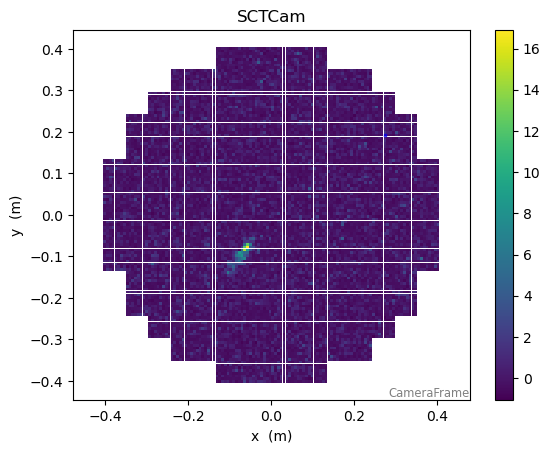

In [32]:
# Display dl1 same method as before
# No cleaning has been done yet
plt.figure(dpi=100)
disp = CameraDisplay(tel.camera.geometry, image=dl1tel.image, cmap='viridis')
#disp.add_frame_name("red")
disp.add_colorbar()
disp.highlight_pixels(4632, color='peru')
disp.highlight_pixels(9632, color='blue')

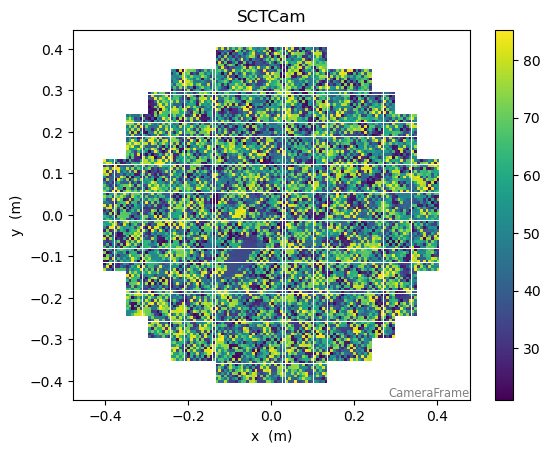

In [33]:
# in arrival time bins
plt.figure(dpi=100)
disp = CameraDisplay(tel.camera.geometry, image=dl1tel.peak_time, cmap='viridis')
disp.add_colorbar()

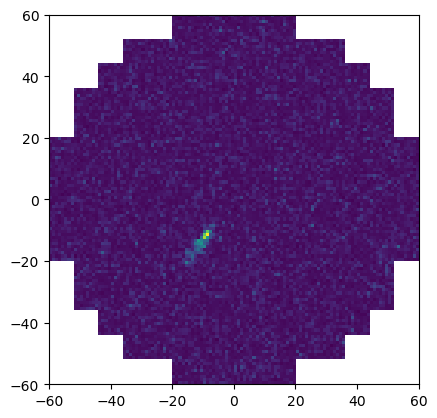

In [34]:
# Notice that the display is not the best 
# It will be easier to view things by using the following method
# It will turn the image into a 2D histogram
image_square = tel.camera.geometry.image_to_cartesian_representation(dl1tel.image)
centered_coords = [-image_square.shape[1]/2., image_square.shape[1]/2., -image_square.shape[0]/2., image_square.shape[0]/2. ]
plt.imshow(image_square, extent=centered_coords)

85.20474


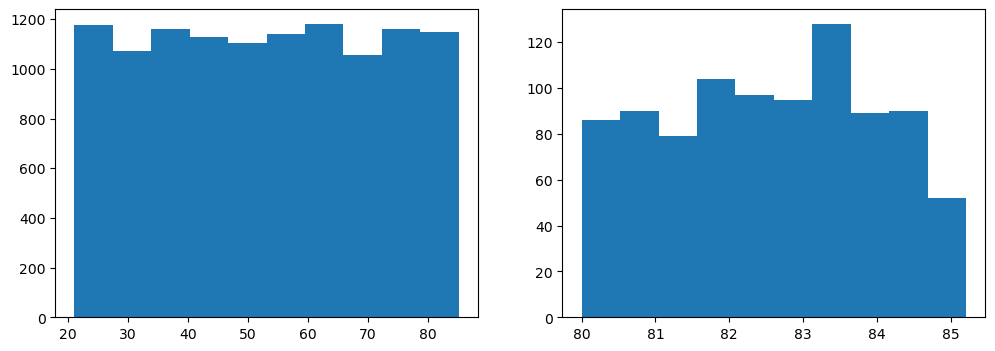

In [35]:
# Peak Time histograms
print(np.max(dl1tel.peak_time))
f, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].hist(dl1tel.peak_time)
axs[1].hist(dl1tel.peak_time[dl1tel.peak_time>80]);

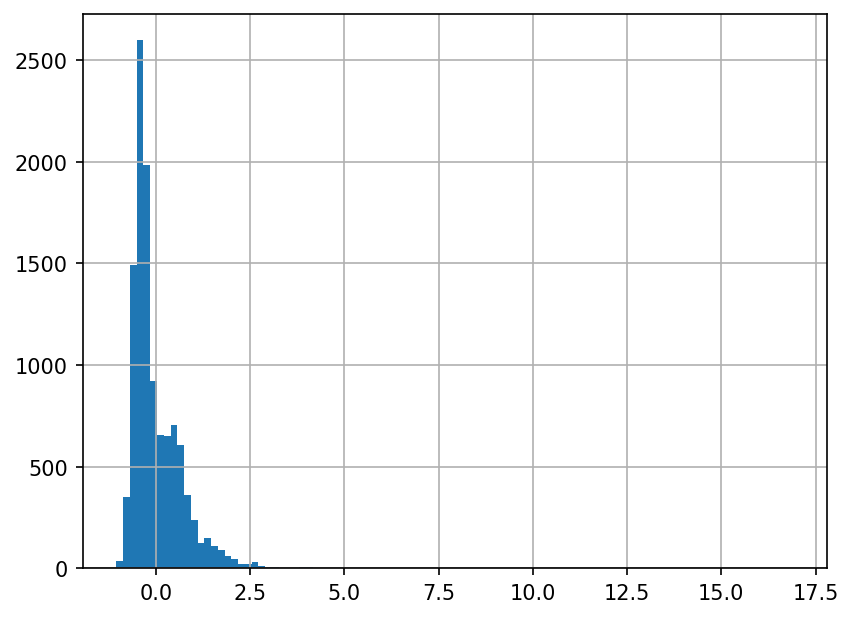

In [36]:
# Displaying histogram of counts for dl1 image
plt.figure(dpi=150)
plt.hist(dl1tel.image, bins=100)
plt.grid();

In [37]:
# Hillas parameters fitting function  
# tailcuts_clean 2 pass cleaning method function
from ctapipe.image import hillas_parameters, tailcuts_clean, apply_time_delta_cleaning, mars_cleaning_1st_pass, dilate, fact_image_cleaning#, time_constrained_clean

In [38]:
# Need an image that has been calibrated 
image = dl1tel.image
# saving the time information
time = dl1tel.peak_time
# tailcuts_clean(geometry, image, image pixel, neighbor pixel)
# image pixel is a factor that multiplies pedestal value 
# neighbor pixel is also a factor that multiplies pedestal value

# tailcuts_clean returns an array of size same as image of booleans corresponding
# to pixels that passed the 2 pass cleaning method
mask = tailcuts_clean(tel.camera.geometry, image)
mask

array([False, False, False, ..., False, False, False])

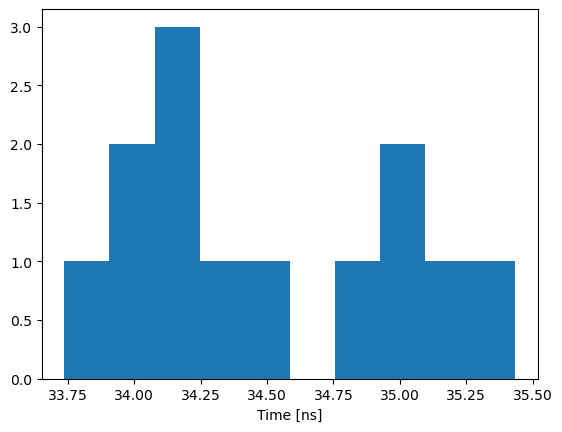

In [39]:
# Time of arrival for actual clean (signal) pixels
plt.hist(dl1tel.peak_time[mask])
plt.xlabel("Time [ns]");

In [40]:
# Dilation adds a row of pixels to the pixels that passed the 
# cleaning making the cleaned area larger
dilated_mask = dilate(tel.camera.geometry,mask)

In [41]:
# I wrote a function that does dilation N times called dilation
from ctapipe_funcs import dilation
N_dilation = dilation(tel.camera.geometry,mask,N=5)

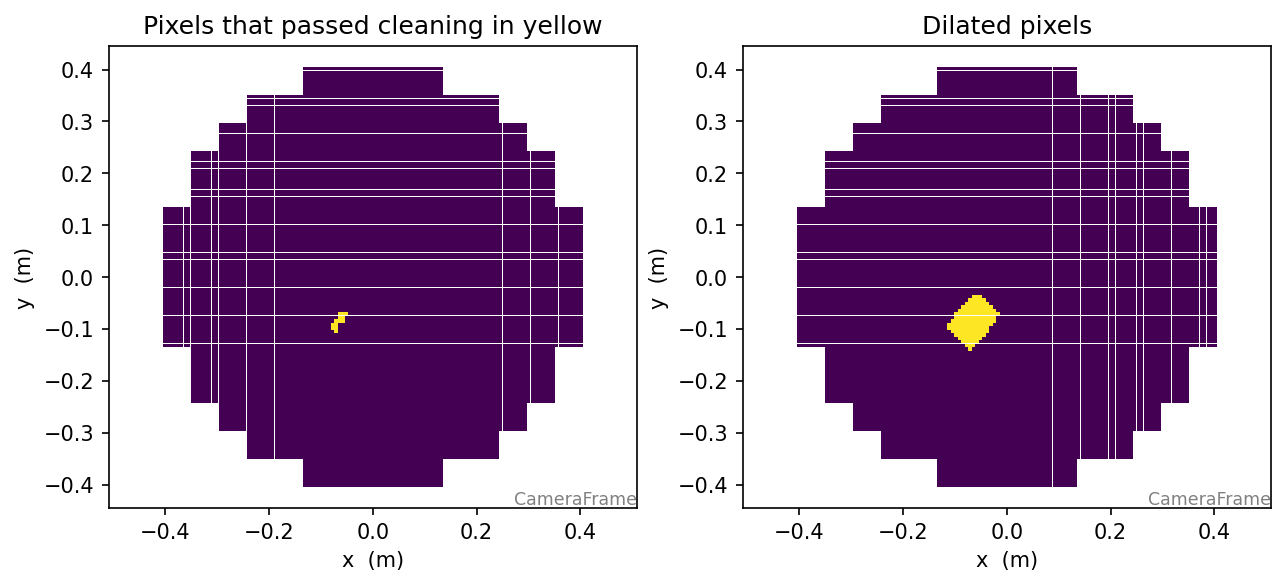

In [42]:
# Displaying the mask without and with dilation
f, axs = plt.subplots(1, 2, figsize=(10,4),dpi=150)
CameraDisplay(tel.camera.geometry, title='Pixels that passed cleaning in yellow', image=mask, ax=axs[0], cmap='viridis')
CameraDisplay(tel.camera.geometry, title='Dilated pixels', image=N_dilation, ax=axs[1], cmap='viridis')

In [43]:
# The cleaned image is given by the image array with only the pixels
# that passed the cleaning algorithm
cleaned = image.copy()
cleaned_dilated = image.copy()

# All the pixels that did not pass the cleaning are set to zero
# This is called zero suppresion
cleaned[~mask] = 0
cleaned_dilated[~N_dilation]=0

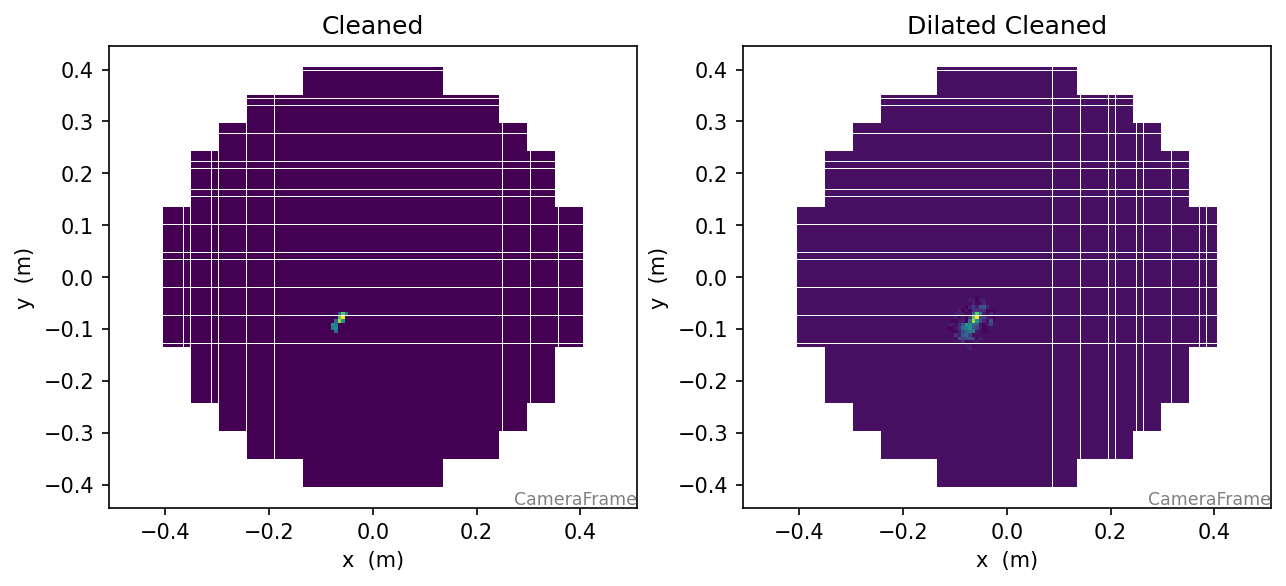

In [44]:
# Displaying the cleaned image
f, axs = plt.subplots(1, 2, figsize=(10,4),dpi=150)
CameraDisplay(tel.camera.geometry, image=cleaned, title='Cleaned', ax=axs[0], cmap='viridis')
CameraDisplay(tel.camera.geometry, image=cleaned_dilated, title='Dilated Cleaned', ax=axs[1], cmap='viridis')

(-0.15, -0.05)

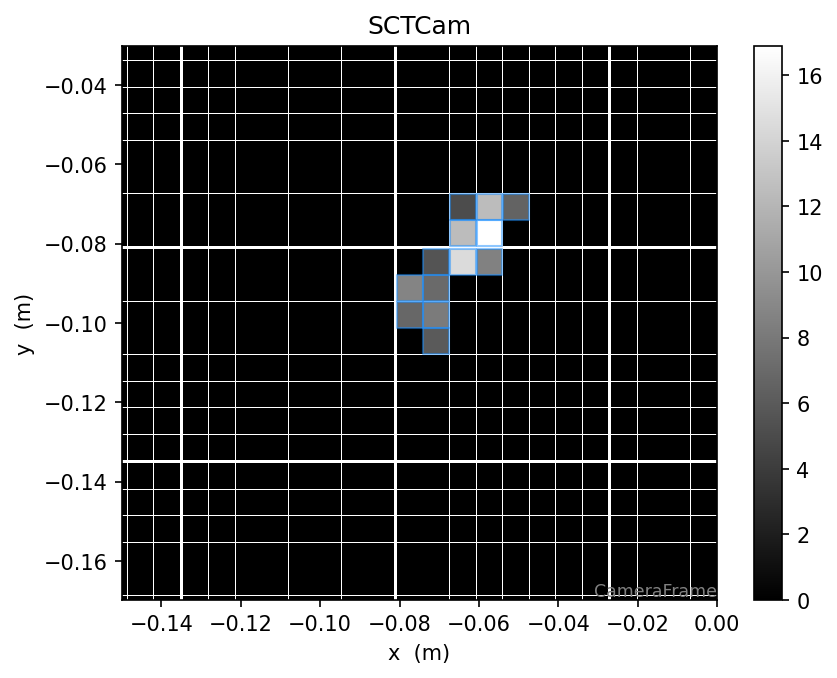

In [45]:
# Zooming in - there might be an interactive way to play around 
# with ctapipe plots but I haven't found it
plt.figure(dpi=150)
disp = CameraDisplay(tel.camera.geometry, image=cleaned, cmap='gray')
disp.highlight_pixels(mask, alpha=0.5, color="dodgerblue")
disp.add_colorbar()
plt.xlim(-0.15,0.0)
plt.ylim(-0.15,-0.05)

In [46]:
# Hillas parameters are acquired by calling the hillas_parameters function
# on the cleaned image
params = hillas_parameters(tel.camera.geometry, cleaned)
print(params)

{'intensity': 118.77458763122559,
 'kurtosis': 1.8543095515608736,
 'length': <Quantity 0.01190331 m>,
 'length_uncertainty': <Quantity 0.00050476 m>,
 'phi': <Angle -2.22740464 rad>,
 'psi': <Angle 0.95492895 rad>,
 'r': <Quantity 0.10553764 m>,
 'skewness': -0.3059273537035427,
 'width': <Quantity 0.0039154 m>,
 'width_uncertainty': <Quantity 0.00019501 m>,
 'x': <Quantity -0.06442375 m>,
 'y': <Quantity -0.0835929 m>}


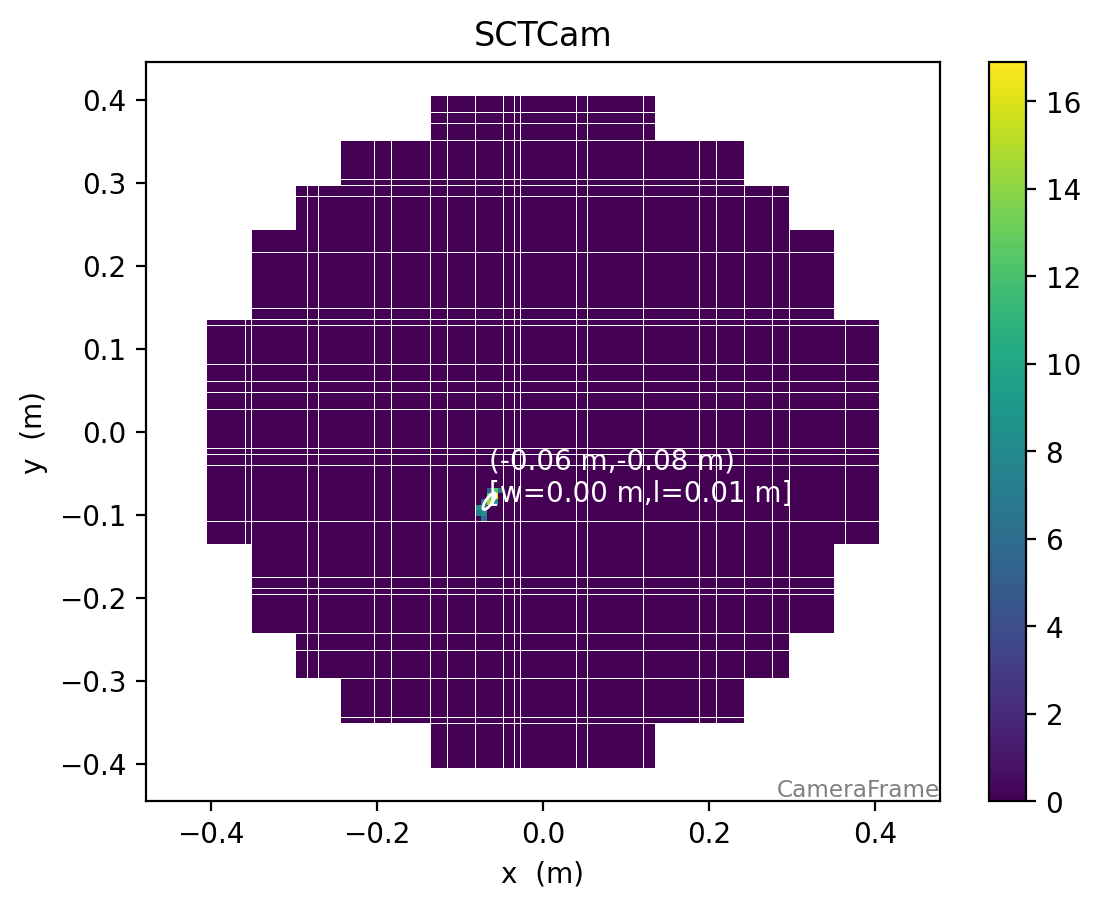

In [47]:
# Display cleaned image with Hillas parameters and overlayed ellipse
plt.figure(dpi=200)
disp = CameraDisplay(tel.camera.geometry, image=cleaned, cmap='viridis')
disp.add_colorbar()
#plt.xlim(-0.15,0.0)
#plt.ylim(-0.15,-0.05)
disp.overlay_moments(params, color='white', lw=1)

<bound method Figure.set_tight_layout of <Figure size 1800x1000 with 8 Axes>>

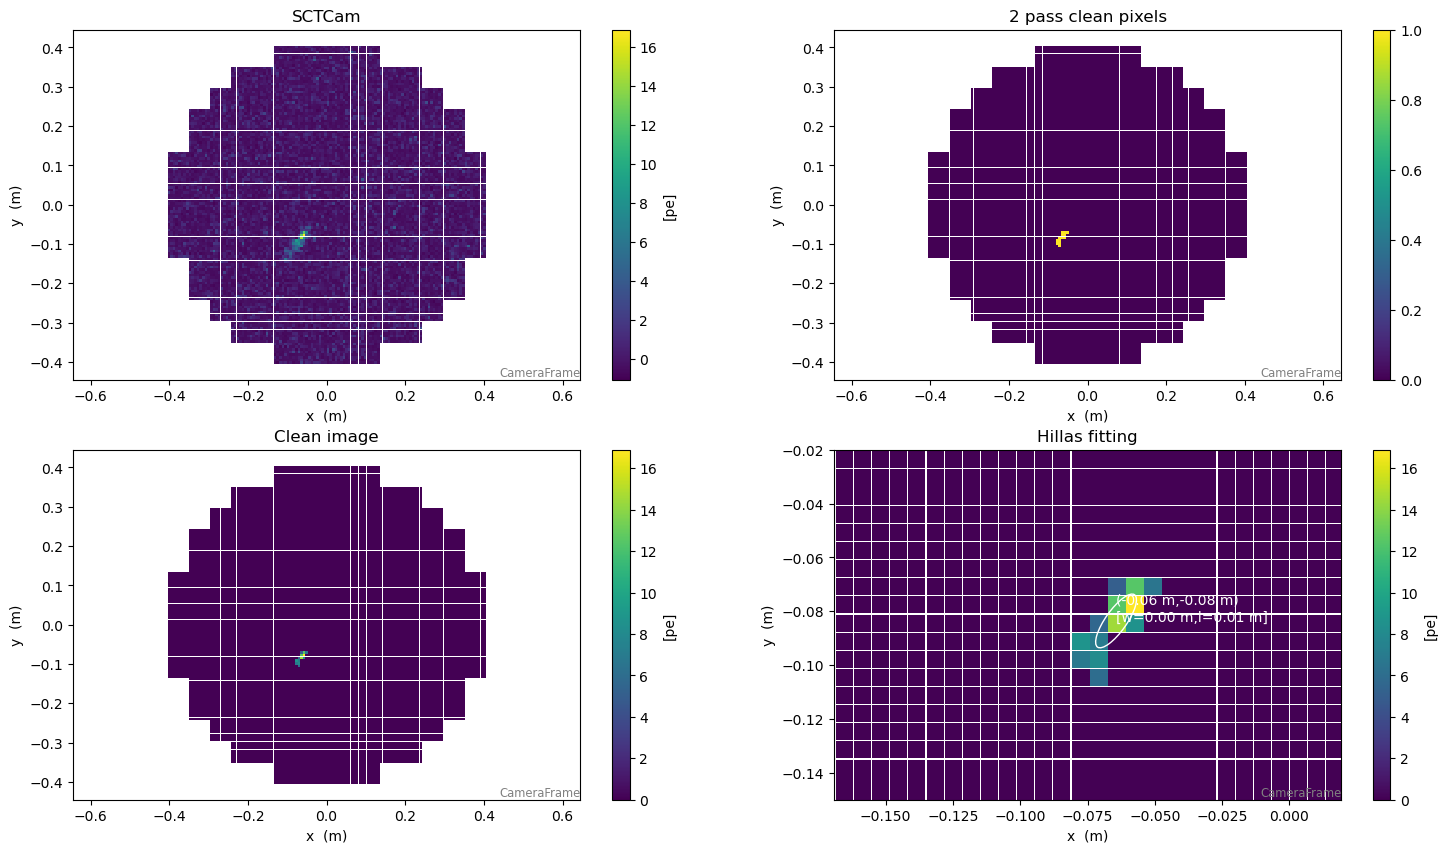

In [48]:
# Displaying the cleaning process
f, axs = plt.subplots(2, 2, figsize=(18,10))

disp1 = CameraDisplay(tel.camera.geometry, image=dl1tel.image, ax=axs[0][0],cmap='viridis')
disp1.add_colorbar(label=r'[pe]')

disp2 = CameraDisplay(tel.camera.geometry, image=mask, ax=axs[0][1], title='2 pass clean pixels', cmap='viridis')
disp2.add_colorbar()

disp3 = CameraDisplay(tel.camera.geometry, image=cleaned, ax=axs[1][0], title='Clean image', cmap='viridis')
disp3.add_colorbar(label=r'[pe]')

disp4 = CameraDisplay(tel.camera.geometry, image=cleaned, ax=axs[1][1], title='Hillas fitting', cmap='viridis')
disp4.add_colorbar(label=r'[pe]')
disp4.overlay_moments(params,color='white',lw=1)
axs[1][1].set_xlim(-0.15,0.0)
axs[1][1].set_ylim(-0.15,-0.02)

f.set_tight_layout

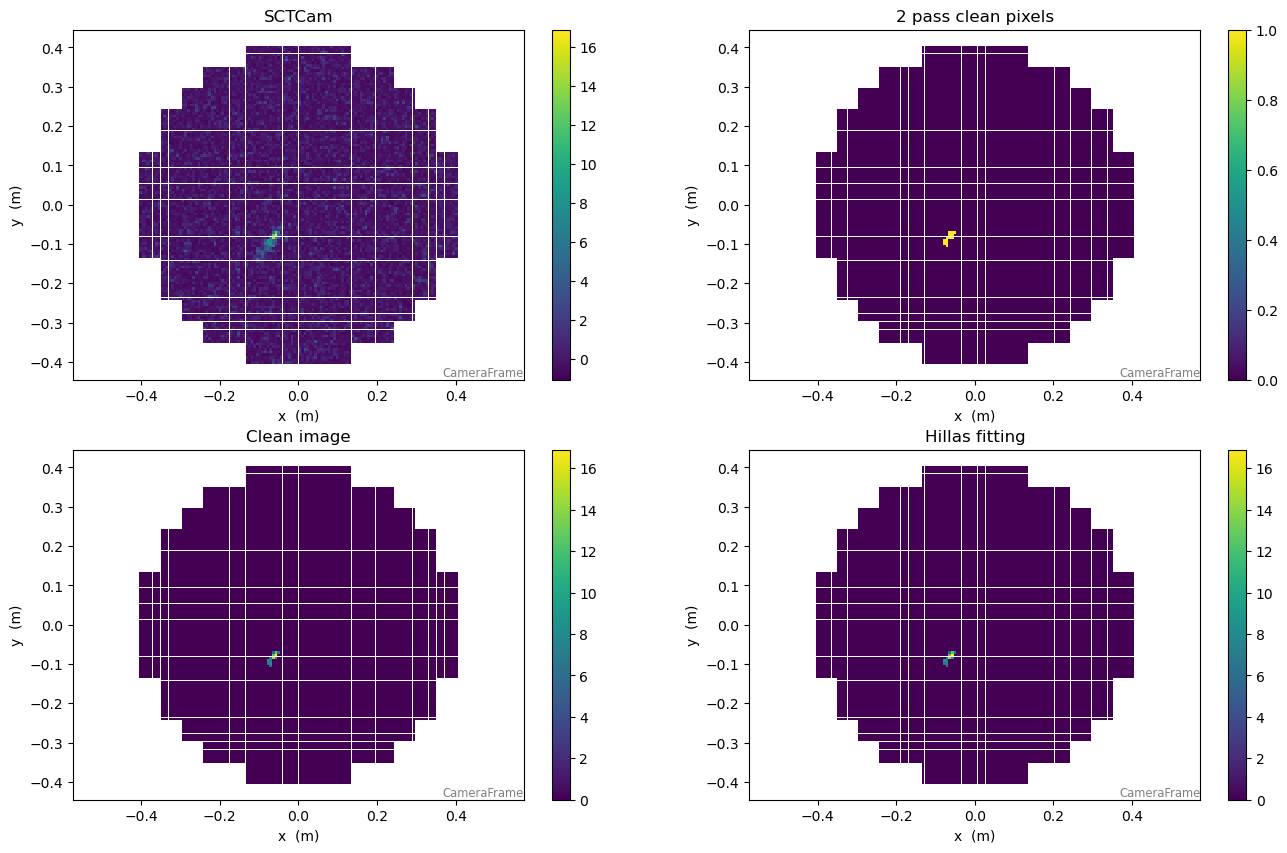

In [49]:
# You can slowly getting more efficient displaying images by figuring out ways
# to do for loops. Check out this example.
images_to_display = [dl1tel.image, mask, cleaned, cleaned]
plot_titles = ['SCTCam', '2 pass clean pixels', 'Clean image', 'Hillas fitting']

f, axs = plt.subplots(2, 2, figsize=(16,10))

for images, ax, title in zip(images_to_display, axs.flatten(), plot_titles):
    disp = CameraDisplay(tel.camera.geometry,image=images, ax=ax, cmap='viridis')
    disp.add_colorbar()
    ax.set_title(title)

In [50]:
# Displaying the other cleaning available
# 3 pass
mask_3pass = mars_cleaning_1st_pass(tel.camera.geometry, image, 4, 2, min_number_picture_neighbors=2)
# fact
mask_fact = fact_image_cleaning(tel.camera.geometry, image, arrival_times=time)
# time constrained
#mask_time_constrained = time_constrained_clean(tel.camera.geomtry, image, arrival_times=time)
# time delta cleaning
mask_time_delta_clean = apply_time_delta_cleaning(tel.camera.geometry, mask=mask, arrival_times=time, min_number_neighbors=1, time_limit=5)

In [51]:
# newly cleaned images
image_3pass = image.copy()
image_3pass[~mask_3pass]=0
image_fact = image.copy()
image_fact[~mask_fact]=0
#image_time_constrained = image.copy()
#image_time_constrained[~mask_time_constrained]=0
image_time_delta_clean = image.copy()
image_time_delta_clean[~mask_time_delta_clean]=0

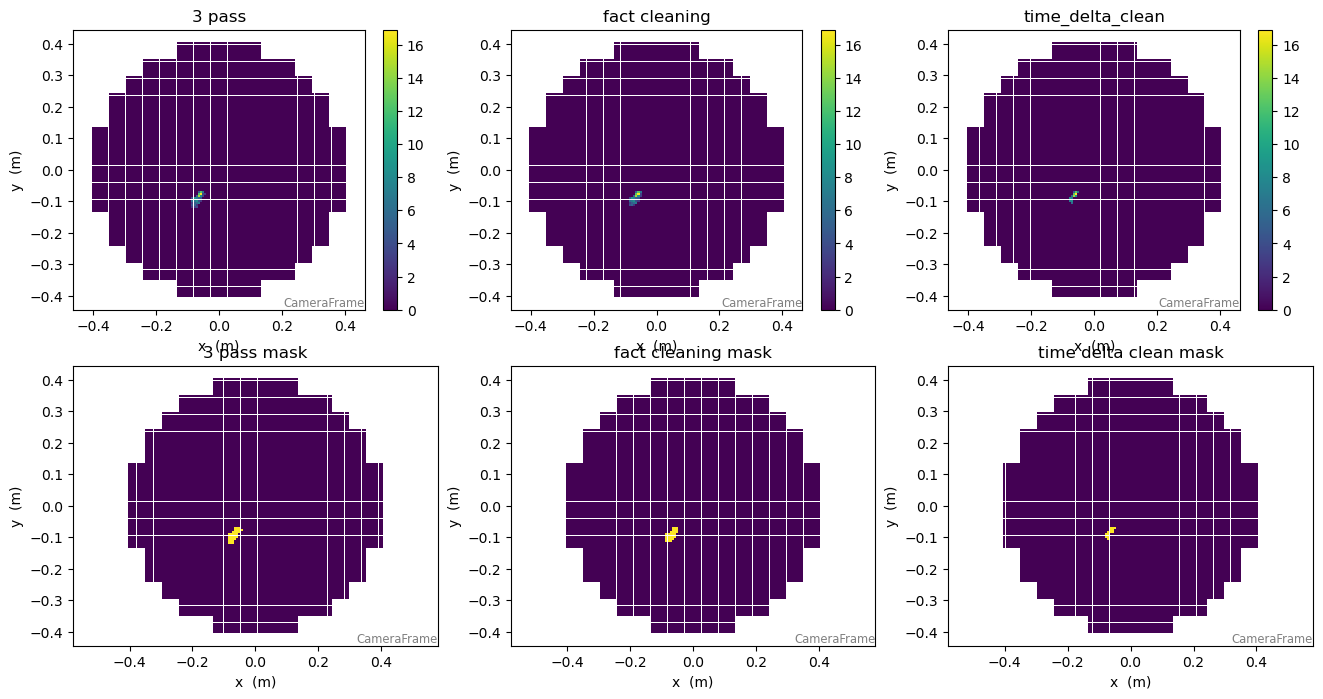

In [52]:
# Displaying the different cleaning methods
to_display = [image_3pass, image_fact, image_time_delta_clean, mask_3pass, mask_fact, mask_time_delta_clean]
titles = ['3 pass', 'fact cleaning', 'time_delta_clean', '3 pass mask', 'fact cleaning mask', 'time delta clean mask']

f, axs = plt.subplots(2, 3, figsize=(16,8))
cumulative = 0
for images, ax, title in zip(to_display, axs.flatten(), titles):
    disp = CameraDisplay(tel.camera.geometry,image=images, ax=ax, cmap='viridis')
    if cumulative < 3:
        disp.add_colorbar()
    ax.set_title(title)
    cumulative +=1

In [53]:
dilate1 = dilation(tel.camera.geometry,mask,N=2)
dilate2 = dilation(tel.camera.geometry,mask,N=4)
dilate3 = dilation(tel.camera.geometry,mask,N=6)
dilate4 = dilation(tel.camera.geometry,mask,N=8)
dilate5 = dilation(tel.camera.geometry,mask,N=10)

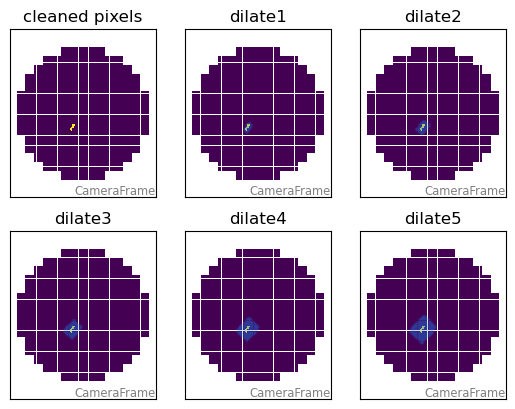

In [70]:
to_display = [mask,dilate1,dilate2,
              dilate3,dilate4,dilate5,]
titles = ['cleaned pixels', 'dilate1','dilate2',
          'dilate3','dilate4','dilate5', ]
counter = 0
f, axs = plt.subplots(2, 3,)
for images, ax, title in zip(to_display, axs.flatten(), titles):
    disp = CameraDisplay(tel.camera.geometry,image=mask, ax=ax, cmap='viridis')
    ax.set_title(title)
#both',size=0, width=0)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])
    if counter >=1 :
        disp.highlight_pixels(images, color='dodgerblue', alpha=0.1)
    counter+=1
fig.tight_layout()